In [18]:
from funcs.notebook import *

In [58]:
df = pd.read_csv("../results/adtests.csv")

In [59]:
# select the latest results
df = df[df.tstamp>="2021-12-14"]
df.tail()

,tstamp,period,sector,subsample,AD,p,nflares,nsteps_mcmc,totobs_days,shift
1273,2021-12-14,Orbit,Both Sectors,total,1.401423,0.3838,189,10000,48.449074,0.95
1274,2021-12-14,Rotation,Sector 1,total,1.061370,0.6546,75,10000,25.130556,0.65
1275,2021-12-14,Rotation,Sector 1,total,0.848239,0.9066,75,10000,25.130556,0.75
1276,2021-12-14,Rotation,Sector 1,total,1.646833,0.2460,75,10000,25.130556,0.85
1277,2021-12-14,Rotation,Sector 1,total,2.414365,0.1166,75,10000,25.130556,0.95


In [60]:
df = df[df.nsteps_mcmc == 10000]
df = df.drop_duplicates(subset=["sector",'subsample','period',"shift"], keep="last")
new = df.groupby(["sector",'subsample','period'])["shift"].count()
new

sector        subsample         period     
Both Sectors  high energy half  Beat Period    20
                                Orbit          20
                                Rotation       20
              low energy half   Beat Period    20
                                Orbit          20
                                Rotation       20
              total             Beat Period    20
                                Orbit          20
                                Rotation       20
Sector 1      high energy half  Beat Period    20
                                Orbit          20
                                Rotation       20
              low energy half   Beat Period    20
                                Orbit          20
                                Rotation       20
              total             Beat Period    20
                                Orbit          20
                                Rotation       20
Sector 27     high energy half  Beat Period    20
      

In [61]:
assert df.shape[0] == 540

In [62]:
groupedmed = df.groupby(["period", "sector", "subsample"]).p.median()
groupedvar = df.groupby(["period", "sector", "subsample"]).p.std()

In [63]:
d = pd.DataFrame({"pval":groupedmed, "sig":groupedvar})
d

pval       sig
period      sector       subsample                         
Beat Period Both Sectors high energy half  0.3714  0.297524
                         low energy half   0.7387  0.323206
                         total             0.4300  0.254602
            Sector 1     high energy half  0.4821  0.269374
                         low energy half   0.4428  0.288875
                         total             0.7147  0.289612
            Sector 27    high energy half  0.4790  0.318859
                         low energy half   0.6848  0.207283
                         total             0.6841  0.194760
Orbit       Both Sectors high energy half  0.0664  0.054473
                         low energy half   0.5177  0.231964
                         total             0.2050  0.134208
            Sector 1     high energy half  0.2696  0.180409
                         low energy half   0.5579  0.321803
                         total             0.2043  0.204856
            Sector 27    high energy half  0.4387  0.254264
                         low energy half   0.5175  0.272459
                         total             0.5268  0.284179
Rotation    Both Sectors high energy half  0.7946  0.278159
                         low energy half   0.7764  0.352562
                         total             0.5670  0.299407
            Sector 1     high energy half  0.7412  0.319869
                         low energy half   0.6298  0.273079
                         total             0.6363  0.272205
            Sector 27    high energy half  0.1005  0.132613
                         low energy half   0.5257  0.278632
                         total             0.2360  0.259026

In [64]:
dd = d.apply(lambda x: fr"${x.pval:.2f}$", axis=1)#\pm {x.sig:.2f}

In [65]:
ddd = dd.unstack(level=0).T

In [66]:
groupedn = df.groupby(["period", "sector", "subsample"]).nflares.first().unstack(level=0).T.iloc[0]
groupedn = groupedn.rename("# flares")

In [67]:
dddd = ddd.append(groupedn)
names = [r'$n$', "$p(P_{orb})$", "$p(P_{rot})$", "$p(P_{syn})$"]
oldnames = [r'# flares', "Orbit", "Rotation", "Beat Period"]
dddd = dddd.T.rename(index=str, columns=dict(zip(oldnames, names))).T
dddd

sector           Both Sectors                                 Sector 1  \
subsample    high energy half low energy half   total high energy half   
period                                                                   
$p(P_{syn})$           $0.37$          $0.74$  $0.43$           $0.48$   
$p(P_{orb})$           $0.07$          $0.52$  $0.21$           $0.27$   
$p(P_{rot})$           $0.79$          $0.78$  $0.57$           $0.74$   
$n$                        71             118     189               38   

sector                                      Sector 27                          
subsample    low energy half   total high energy half low energy half   total  
period                                                                         
$p(P_{syn})$          $0.44$  $0.71$           $0.48$          $0.68$  $0.68$  
$p(P_{orb})$          $0.56$  $0.20$           $0.44$          $0.52$  $0.53$  
$p(P_{rot})$          $0.63$  $0.64$           $0.10$          $0.53$  $0.24$  
$n$                       37      75               33              81     114

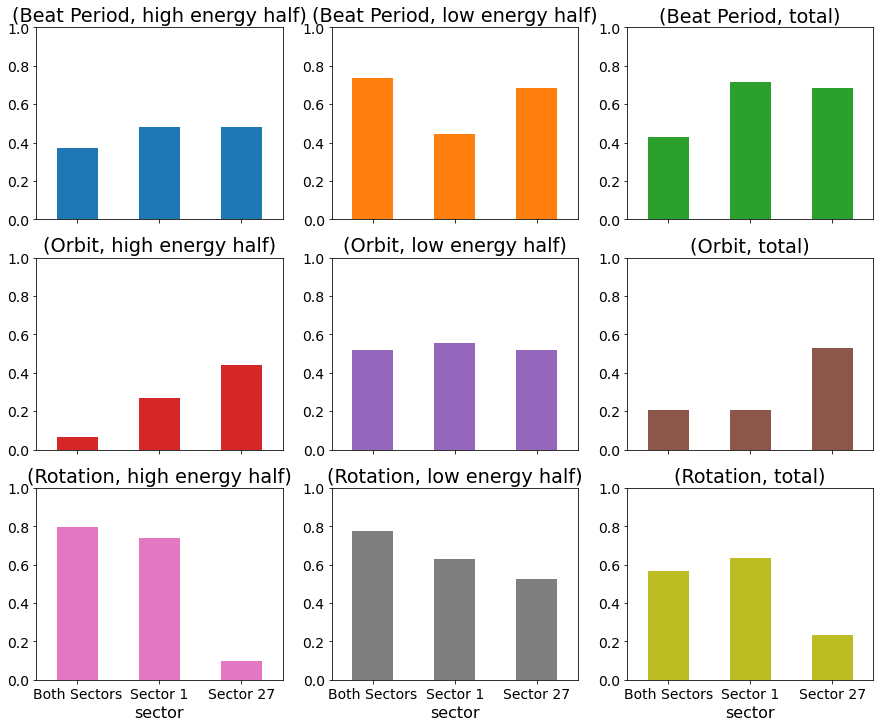

In [68]:
f = df.groupby(["period", "sector","subsample"]).p.median()
f.unstack(level=0).unstack(level=1).plot(kind='bar', subplots=True, rot=0, 
                                         figsize=(15, 12), layout=(3, 3), legend=False,
                                         ylim=(0,1));

In [72]:
stri = dddd.T[names].to_latex(index=True, escape=False, column_format=f"llcccc")
stri = stri.replace("\\toprule","\hline")
stri = stri.replace("\\midrule","\hline")
stri = stri.replace("{}","\hline")
stri = stri.replace("\\bottomrule","\hline\n" )
stri = stri.replace("%","\%" )
stri = stri.replace("high energy half","$ED>1\,$s")
stri = stri.replace("low energy half","$ED<1\,$s")
stri = stri.replace("Both Sectors","both")
stri = stri.replace("Sector 27","27")
stri = stri.replace("Sector 1","1")
stri = stri.replace("subsample &      &","sample &     $n$ &")
stri = stri.replace("period","")
stri = stri.replace("&  $n$ & $","&      & $") 
stri = stri.replace("$0.07$","$\mathbf{0.07}$") 

print(stri)

\begin{tabular}{llcccc}
\hline
          &  &      & $p(P_{orb})$ & $p(P_{rot})$ & $p(P_{syn})$ \\
sector & sample &     $n$ &              &              &              \\
\hline
both & $ED>1\,$s &   71 &       $\mathbf{0.07}$ &       $0.79$ &       $0.37$ \\
          & $ED<1\,$s &  118 &       $0.52$ &       $0.78$ &       $0.74$ \\
          & total &  189 &       $0.21$ &       $0.57$ &       $0.43$ \\
1 & $ED>1\,$s &   38 &       $0.27$ &       $0.74$ &       $0.48$ \\
          & $ED<1\,$s &   37 &       $0.56$ &       $0.63$ &       $0.44$ \\
          & total &   75 &       $0.20$ &       $0.64$ &       $0.71$ \\
27 & $ED>1\,$s &   33 &       $0.44$ &       $0.10$ &       $0.48$ \\
          & $ED<1\,$s &   81 &       $0.52$ &       $0.53$ &       $0.68$ \\
          & total &  114 &       $0.53$ &       $0.24$ &       $0.68$ \\
\hline

\end{tabular}



In [73]:
with open("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/tables/pvals.tex", "w") as f:
    f.write(stri)